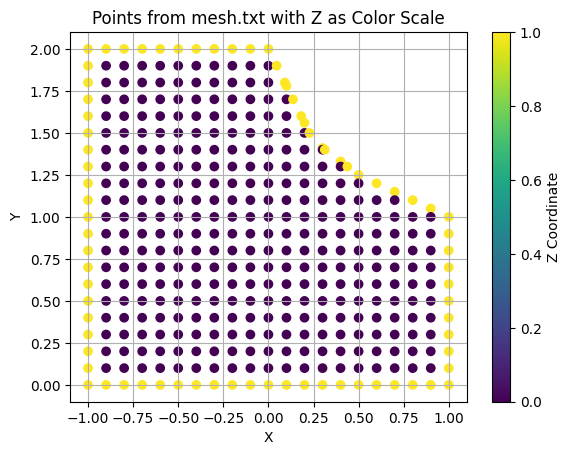

In [368]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt

# Чтение данных из файла с учетом третьей координаты
points = []
try:
    with open('mesh.txt', 'r') as file:
        for line in file:
            try:
                x, y, z = map(float, line.split())
                points.append((x, y, z))
            except ValueError:
                print(f"Строка пропущена из-за ошибки формата: {line.strip()}")
except FileNotFoundError:
    print("Файл 'mesh.txt' не найден.")
    points = []

# Проверка, есть ли данные для обработки
if points:
    # Разделение координат на x, y и z
    x_coords, y_coords, z_coords = zip(*points)

    # Построение графика с цветовой шкалой
    plt.scatter(x_coords, y_coords, c=z_coords, cmap='viridis', marker='o')
    plt.colorbar(label='Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points from mesh.txt with Z as Color Scale')
    plt.grid(True)
    plt.show()
else:
    print("Нет данных для отображения.")

In [364]:
import numpy as np

# Преобразуем список точек в массив numpy для удобства вычислений
points_array = np.array(points)

# Используем numpy для поиска одинаковых строк (точек)
_, idx, counts = np.unique(points_array, axis=0, return_index=True, return_counts=True)

duplicates = []
for i, count in zip(idx, counts):
    if count > 1:
        # Найти все индексы, где точка совпадает с данной
        dup_idxs = np.where(np.all(points_array == points_array[i], axis=1))[0]
        duplicates.append((i, dup_idxs.tolist()))

if duplicates:
    print("Найдены одинаковые точки:")
    for idx, dup_idxs in duplicates:
        print(f"Точка {points[idx]} совпадает с точками {[points[i] for i in dup_idxs if i != idx]}")
else:
    print("Одинаковых точек не найдено.")


Одинаковых точек не найдено.


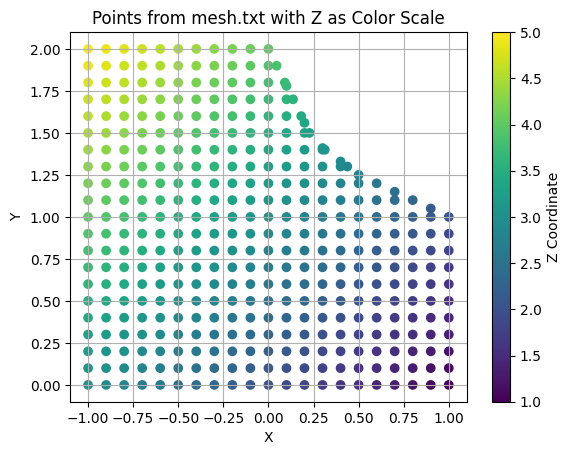

In [365]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt

# Чтение данных из файла с учетом третьей координаты
points = []
try:
    with open('output.txt', 'r') as file:
        for line in file:
            try:
                x, y, z = map(float, line.split())
                points.append((x, y, z))
            except ValueError:
                print(f"Строка пропущена из-за ошибки формата: {line.strip()}")
except FileNotFoundError:
    print("Файл 'output.txt' не найден.")
    points = []

# Проверка, есть ли данные для обработки
if points:
    # Разделение координат на x, y и z
    x_coords, y_coords, z_coords = zip(*points)

    # Построение графика с цветовой шкалой
    plt.scatter(x_coords, y_coords, c=z_coords, cmap='viridis', marker='o')
    plt.colorbar(label='Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points from mesh.txt with Z as Color Scale')
    plt.grid(True)
    plt.show()
else:
    print("Нет данных для отображения.")


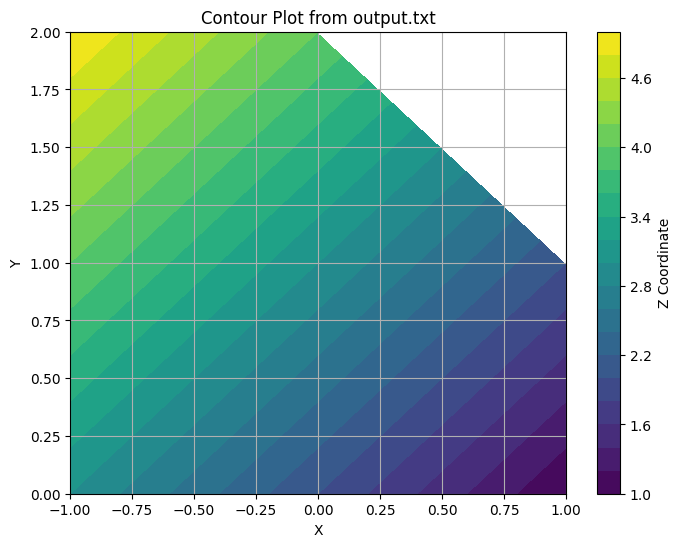

In [366]:
from scipy.interpolate import griddata

# Проверяем, есть ли данные для построения
if points:
    # Преобразуем координаты в массивы numpy
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    z_coords = np.array(z_coords)

    # Создаем сетку для построения линий уровня
    grid_x, grid_y = np.meshgrid(
        np.linspace(x_coords.min(), x_coords.max(), 100),
        np.linspace(y_coords.min(), y_coords.max(), 100)
    )

    # Интерполируем значения z для сетки
    grid_z = griddata((x_coords, y_coords), z_coords, (grid_x, grid_y), method='linear')

    # Построение линий уровня
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot from output.txt')
    plt.grid(True)
    plt.show()
else:
    print("Нет данных для построения линий уровня.")

In [367]:
from collections import Counter

neighbor_counts = Counter()

with open('neighborInfo.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        # Ищем индексы соседей после ключевых слов up:, down:, left:, right:
        for key in ['up:', 'down:', 'left:', 'right:']:
            if key in parts:
                idx = parts.index(key)
                neighbor_idx = int(parts[idx + 1])
                if neighbor_idx != -1:
                    neighbor_counts[neighbor_idx] += 1

# Находим точки, которые являются соседями более 4 раз
overused_neighbors = [idx for idx, count in neighbor_counts.items() if count > 4]

if overused_neighbors:
    print("Точки, которые являются соседями более 4 раз:")
    for idx in overused_neighbors:
        print(f"Точка с индексом {idx} встречается как сосед {neighbor_counts[idx]} раз(а)")
else:
    print("Нет точек, которые являются соседями более 4 раз.")

Точки, которые являются соседями более 4 раз:
Точка с индексом 322 встречается как сосед 60 раз(а)
Точка с индексом 337 встречается как сосед 53 раз(а)
Точка с индексом 422 встречается как сосед 24 раз(а)
Точка с индексом 62 встречается как сосед 68 раз(а)
Точка с индексом 77 встречается как сосед 57 раз(а)
Точка с индексом 42 встречается как сосед 47 раз(а)
Точка с индексом 57 встречается как сосед 47 раз(а)
Точка с индексом 82 встречается как сосед 64 раз(а)
Точка с индексом 102 встречается как сосед 64 раз(а)
Точка с индексом 97 встречается как сосед 53 раз(а)
Точка с индексом 122 встречается как сосед 64 раз(а)
Точка с индексом 117 встречается как сосед 53 раз(а)
Точка с индексом 142 встречается как сосед 64 раз(а)
Точка с индексом 137 встречается как сосед 53 раз(а)
Точка с индексом 162 встречается как сосед 64 раз(а)
Точка с индексом 157 встречается как сосед 53 раз(а)
Точка с индексом 182 встречается как сосед 64 раз(а)
Точка с индексом 177 встречается как сосед 53 раз(а)
Точка 